## 바른 학습을 위해
- 오버피팅 방지하는 다양한 방법

In [5]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
# weight decay（가중치 감쇠） 설정
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1

In [4]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [8]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

epoch마다 train acc와 test acc 확인

In [9]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.09, test acc:0.1032
epoch:1, train acc:0.09666666666666666, test acc:0.1038
epoch:2, train acc:0.09333333333333334, test acc:0.1052
epoch:3, train acc:0.10333333333333333, test acc:0.11
epoch:4, train acc:0.10333333333333333, test acc:0.1136
epoch:5, train acc:0.11, test acc:0.1154
epoch:6, train acc:0.11666666666666667, test acc:0.121
epoch:7, train acc:0.15333333333333332, test acc:0.1285
epoch:8, train acc:0.15666666666666668, test acc:0.1361
epoch:9, train acc:0.17, test acc:0.1402
epoch:10, train acc:0.2, test acc:0.1572
epoch:11, train acc:0.21333333333333335, test acc:0.165
epoch:12, train acc:0.25666666666666665, test acc:0.1903
epoch:13, train acc:0.2866666666666667, test acc:0.2089
epoch:14, train acc:0.31666666666666665, test acc:0.2305
epoch:15, train acc:0.33666666666666667, test acc:0.2481
epoch:16, train acc:0.3433333333333333, test acc:0.2492
epoch:17, train acc:0.36666666666666664, test acc:0.2649
epoch:18, train acc:0.3933333333333333, test acc:0.

epoch:160, train acc:0.86, test acc:0.7175
epoch:161, train acc:0.86, test acc:0.7119
epoch:162, train acc:0.85, test acc:0.7002
epoch:163, train acc:0.8433333333333334, test acc:0.6957
epoch:164, train acc:0.8533333333333334, test acc:0.7033
epoch:165, train acc:0.8566666666666667, test acc:0.7083
epoch:166, train acc:0.8466666666666667, test acc:0.7058
epoch:167, train acc:0.8566666666666667, test acc:0.7111
epoch:168, train acc:0.8533333333333334, test acc:0.7062
epoch:169, train acc:0.85, test acc:0.7024
epoch:170, train acc:0.8533333333333334, test acc:0.7052
epoch:171, train acc:0.84, test acc:0.7006
epoch:172, train acc:0.85, test acc:0.708
epoch:173, train acc:0.8466666666666667, test acc:0.7057
epoch:174, train acc:0.8533333333333334, test acc:0.7133
epoch:175, train acc:0.8433333333333334, test acc:0.702
epoch:176, train acc:0.8533333333333334, test acc:0.7088
epoch:177, train acc:0.8533333333333334, test acc:0.7119
epoch:178, train acc:0.8566666666666667, test acc:0.7089
epo

그래프로 표현하기

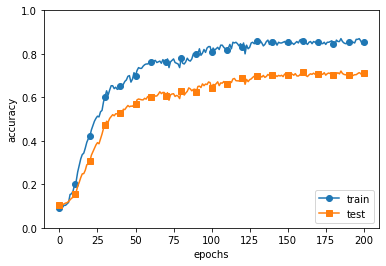

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 가중치 감소로 오버피팅 억제하기

In [11]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [12]:
# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우

In [13]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [14]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [15]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.09, test acc:0.0966
epoch:1, train acc:0.10333333333333333, test acc:0.1052
epoch:2, train acc:0.14, test acc:0.1141
epoch:3, train acc:0.16333333333333333, test acc:0.1276
epoch:4, train acc:0.20333333333333334, test acc:0.1438
epoch:5, train acc:0.23333333333333334, test acc:0.1574
epoch:6, train acc:0.24666666666666667, test acc:0.1779
epoch:7, train acc:0.29, test acc:0.1986
epoch:8, train acc:0.31666666666666665, test acc:0.219
epoch:9, train acc:0.36666666666666664, test acc:0.2366
epoch:10, train acc:0.37333333333333335, test acc:0.2517
epoch:11, train acc:0.38, test acc:0.2694
epoch:12, train acc:0.42333333333333334, test acc:0.2951
epoch:13, train acc:0.45, test acc:0.316
epoch:14, train acc:0.4633333333333333, test acc:0.3302
epoch:15, train acc:0.4666666666666667, test acc:0.3454
epoch:16, train acc:0.49, test acc:0.3607
epoch:17, train acc:0.5333333333333333, test acc:0.3809
epoch:18, train acc:0.54, test acc:0.3979
epoch:19, train acc:0.56, test acc:0.

epoch:160, train acc:1.0, test acc:0.7554
epoch:161, train acc:1.0, test acc:0.7557
epoch:162, train acc:1.0, test acc:0.7558
epoch:163, train acc:1.0, test acc:0.7546
epoch:164, train acc:1.0, test acc:0.7555
epoch:165, train acc:1.0, test acc:0.7573
epoch:166, train acc:1.0, test acc:0.7573
epoch:167, train acc:1.0, test acc:0.7581
epoch:168, train acc:1.0, test acc:0.757
epoch:169, train acc:1.0, test acc:0.755
epoch:170, train acc:1.0, test acc:0.7553
epoch:171, train acc:1.0, test acc:0.7561
epoch:172, train acc:1.0, test acc:0.7553
epoch:173, train acc:1.0, test acc:0.7548
epoch:174, train acc:1.0, test acc:0.7592
epoch:175, train acc:1.0, test acc:0.7566
epoch:176, train acc:1.0, test acc:0.7572
epoch:177, train acc:1.0, test acc:0.7588
epoch:178, train acc:1.0, test acc:0.7568
epoch:179, train acc:1.0, test acc:0.7552
epoch:180, train acc:1.0, test acc:0.7523
epoch:181, train acc:1.0, test acc:0.7565
epoch:182, train acc:1.0, test acc:0.7583
epoch:183, train acc:1.0, test acc:0

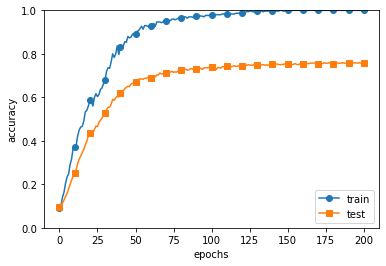

In [16]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 가중치 감쇠 0.1을 주지 않으면 train acc가 0.99 넘게 오버피팅이 발생
- 가중치 감쇠 0.2 적용 시, 학습이 제대로 되지 않는 모습 적절한 가중치 감쇠 필요

In [17]:
# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0.2 # weight decay를 사용하지 않을 경우

In [18]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [19]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [20]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11666666666666667, test acc:0.1014
epoch:1, train acc:0.12333333333333334, test acc:0.1047
epoch:2, train acc:0.13666666666666666, test acc:0.1114
epoch:3, train acc:0.14666666666666667, test acc:0.1208
epoch:4, train acc:0.17666666666666667, test acc:0.1482
epoch:5, train acc:0.2, test acc:0.1734
epoch:6, train acc:0.23, test acc:0.1849
epoch:7, train acc:0.25, test acc:0.193
epoch:8, train acc:0.27, test acc:0.2128
epoch:9, train acc:0.31333333333333335, test acc:0.2432
epoch:10, train acc:0.3566666666666667, test acc:0.2786
epoch:11, train acc:0.36666666666666664, test acc:0.2865
epoch:12, train acc:0.42333333333333334, test acc:0.3194
epoch:13, train acc:0.4166666666666667, test acc:0.3182
epoch:14, train acc:0.42333333333333334, test acc:0.3364
epoch:15, train acc:0.46, test acc:0.3526
epoch:16, train acc:0.4766666666666667, test acc:0.3656
epoch:17, train acc:0.4866666666666667, test acc:0.3824
epoch:18, train acc:0.49333333333333335, test acc:0.3924
epoch:19

epoch:157, train acc:0.3933333333333333, test acc:0.3313
epoch:158, train acc:0.3933333333333333, test acc:0.3265
epoch:159, train acc:0.38666666666666666, test acc:0.3222
epoch:160, train acc:0.37666666666666665, test acc:0.3194
epoch:161, train acc:0.37666666666666665, test acc:0.3168
epoch:162, train acc:0.38, test acc:0.3179
epoch:163, train acc:0.37666666666666665, test acc:0.3168
epoch:164, train acc:0.37666666666666665, test acc:0.3149
epoch:165, train acc:0.36666666666666664, test acc:0.3121
epoch:166, train acc:0.36, test acc:0.3056
epoch:167, train acc:0.35333333333333333, test acc:0.2993
epoch:168, train acc:0.3433333333333333, test acc:0.2942
epoch:169, train acc:0.33666666666666667, test acc:0.2907
epoch:170, train acc:0.32666666666666666, test acc:0.2834
epoch:171, train acc:0.33, test acc:0.2809
epoch:172, train acc:0.32666666666666666, test acc:0.28
epoch:173, train acc:0.32666666666666666, test acc:0.2793
epoch:174, train acc:0.32666666666666666, test acc:0.2771
epoch:

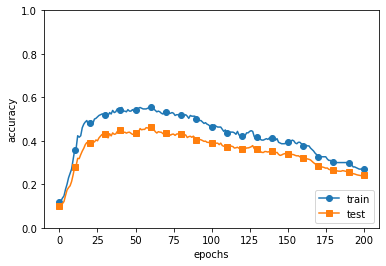

In [21]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()